In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [16]:
os.getcwd()

'd:\\Users\\User\\End-to-end-Deep-learning-project\\datasets'

In [17]:
os.chdir("data")

In [18]:
os.getcwd()

'd:\\Users\\User\\End-to-end-Deep-learning-project\\datasets\\data'

In [19]:
data_path = os.getcwd()

# data exploration

In [20]:
classes = ["NORMAL", "PNEUMONIA"]


In [21]:
# getting the list of files

def get_list_of_files(dir_name):

    file_list = os.listdir(dir_name)
    return file_list

In [27]:
list_of_noraml_train_files = get_list_of_files(data_path+"/train/"+classes[0])
list_of_noraml_train_files

['IM-0001-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg',
 'IM-0009-0001.jpeg',
 'IM-0010-0001.jpeg',
 'IM-0011-0001-0001.jpeg',
 'IM-0011-0001-0002.jpeg',
 'IM-0011-0001.jpeg',
 'IM-0013-0001.jpeg',
 'IM-0015-0001.jpeg',
 'IM-0016-0001.jpeg',
 'IM-0017-0001.jpeg',
 'IM-0019-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0022-0001.jpeg',
 'IM-0023-0001.jpeg',
 'IM-0025-0001.jpeg',
 'IM-0027-0001.jpeg',
 'IM-0028-0001.jpeg',
 'IM-0029-0001.jpeg',
 'IM-0030-0001.jpeg',
 'IM-0031-0001.jpeg',
 'IM-0033-0001-0001.jpeg',
 'IM-0033-0001-0002.jpeg',
 'IM-0033-0001.jpeg',
 'IM-0035-0001.jpeg',
 'IM-0036-0001.jpeg',
 'IM-0037-0001.jpeg',
 'IM-0039-0001.jpeg',
 'IM-0041-0001.jpeg',
 'IM-0043-0001.jpeg',
 'IM-0045-0001.jpeg',
 'IM-0046-0001.jpeg',
 'IM-0049-0001.jpeg',
 'IM-0050-0001.jpeg',
 'IM-0059-0001.jpeg',
 'IM-0061-0001.jpeg',
 'IM-0063-0001.jpeg',
 'IM-0065-0001.jpeg',
 'IM-0067-0001.jpeg',
 'IM-0069-0001.jpeg',
 'IM-0070-0001.jpeg',
 'IM-0071-00

In [28]:
list_of_pneumonia_test_files = get_list_of_files(data_path+"/test/"+classes[1])
list_of_pneumonia_test_files

['person10_virus_35.jpeg',
 'person11_virus_38.jpeg',
 'person14_virus_44.jpeg',
 'person15_virus_46.jpeg',
 'person16_virus_47.jpeg',
 'person17_virus_48.jpeg',
 'person18_virus_49.jpeg',
 'person19_virus_50.jpeg',
 'person1_virus_11.jpeg',
 'person1_virus_12.jpeg',
 'person1_virus_13.jpeg',
 'person1_virus_6.jpeg',
 'person1_virus_7.jpeg',
 'person1_virus_8.jpeg',
 'person1_virus_9.jpeg',
 'person20_virus_51.jpeg',
 'person21_virus_52.jpeg',
 'person21_virus_53.jpeg',
 'person22_virus_54.jpeg',
 'person22_virus_55.jpeg',
 'person23_virus_56.jpeg',
 'person24_virus_58.jpeg',
 'person25_virus_59.jpeg',
 'person26_virus_60.jpeg',
 'person28_virus_62.jpeg',
 'person3_virus_15.jpeg',
 'person3_virus_16.jpeg',
 'person3_virus_17.jpeg',
 'person8_virus_27.jpeg',
 'person8_virus_28.jpeg']

In [29]:
list_of_pleumonia_train_files = get_list_of_files(data_path+"/train/"+classes[1])
list_of_normal_test_files = get_list_of_files(data_path+"/test/"+classes[0])

print("Number of train samples in Normal category {}".format(len(list_of_noraml_train_files)))
print("Number of train samples in Pneumonia category {}".format(len(list_of_pleumonia_train_files)))
print("Number of test samples in Normal category {}".format((len(list_of_normal_test_files))))
print("Number of test samples in Pneumonia category {}".format(len(list_of_pneumonia_test_files)))

Number of train samples in Normal category 105
Number of train samples in Pneumonia category 105
Number of test samples in Normal category 30
Number of test samples in Pneumonia category 30


APPERANCE OF NORMAL CHEST AREA 


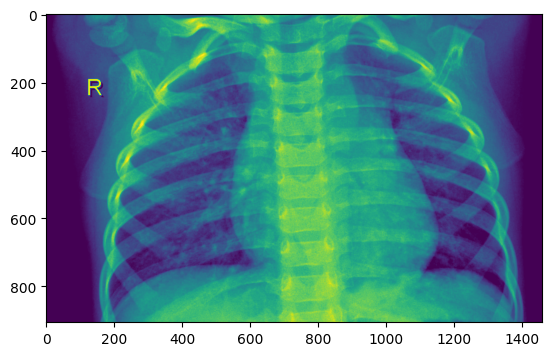

In [39]:
rand_img_no = np.random.randint(0,len(list_of_noraml_train_files))
print("APPERANCE OF NORMAL CHEST AREA ")
img = data_path + "/train/NORMAL/"+ list_of_noraml_train_files[rand_img_no])
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

APPERANCE OF PLEUMONIA CHEST AREA 


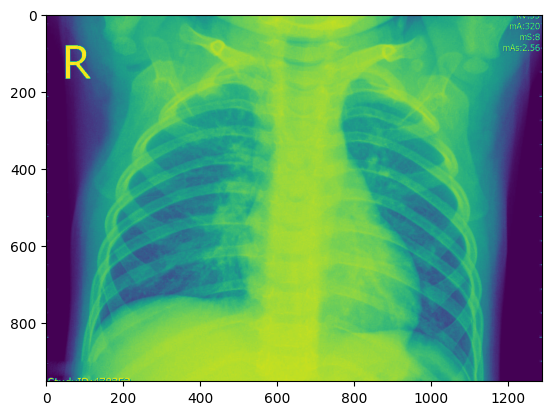

In [43]:
print("APPERANCE OF PLEUMONIA CHEST AREA ")
img = data_path + '/train/PNEUMONIA/'+ list_of_pleumonia_train_files[np.random.randint(0,len(list_of_pleumonia_train_files))]
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

# Data transformation

In [45]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.01, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [47]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [49]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)
train_data

Dataset ImageFolder
    Number of datapoints: 210
    Root location: d:\Users\User\End-to-end-Deep-learning-project\datasets\data\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ColorJitter(brightness=[0.99, 1.01], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [51]:
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)
test_data

Dataset ImageFolder
    Number of datapoints: 60
    Root location: d:\Users\User\End-to-end-Deep-learning-project\datasets\data\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [52]:
train_loader = DataLoader(train_data,
                          batch_size= 2, shuffle= True, pin_memory= True)
test_loader = DataLoader(test_data,
                         batch_size= 2, shuffle= False, pin_memory= True)

In [53]:
class_names = train_data.classes
print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Number of train images: 210
Number of test images: 60


# Model Architecture

In [54]:
class Net(nn.Module):
    def __init__(self):

        super(Net, self).__init__()
       
        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )
        self.pooling11 = nn.MaxPool2d(2, 2)
        
        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.pooling22 = nn.MaxPool2d(2, 2)
        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10),
        )
        self.pooling33 = nn.MaxPool2d(2, 2)
        
        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )

        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )
        self.convolution_block_out = nn.Sequential(
              nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=True),
        )
    def forward(self, x):
        x = self.convolution_block1(x)
        x = self.pooling11(x)
        x = self.convolution_block2(x)
        x = self.pooling22(x)
        x = self.convolution_block3(x)
        x = self.pooling33(x)
        x = self.convolution_block4(x)
        x = self.convolution_block5(x)

        x = self.convolution_block6(x)

        x = self.convolution_block7(x)
        x = self.convolution_block8(x)
        x = self.convolution_block9(x)
        x = self.gap(x)
        x = self.convolution_block_out(x)
        x = x.view(-1, 2)
        return F.log_softmax(x, dim=-1)

In [55]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
summary(model, input_size=(3, 224, 224))

Available processor cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             224
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 20, 109, 109]           1,460
              ReLU-6         [-1, 20, 109, 109]               0
       BatchNorm2d-7         [-1, 20, 109, 109]              40
         MaxPool2d-8           [-1, 20, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             210
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 20, 25, 25]           1,820
             Re

# Train the Model

In [56]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [57]:
def train(model, device, train_loader, optimizer, epoch):

    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        y_pred = model(data)
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        train_acc.append(100*correct/processed)

In [58]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

# model parameters

In [59]:
model =  Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
EPOCHS = 1

In [60]:
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('current Learning Rate: ', optimizer.state_dict()["param_groups"][0]["lr"])
    test(model, device, test_loader)

EPOCH: 0


Loss=1.4493352174758911 Batch_id=104 Accuracy=57.14: 100%|██████████| 105/105 [00:11<00:00,  9.16it/s]


current Learning Rate:  0.01

Test set: Average loss: 0.4058, Accuracy: 50/60 (83.33%)



Text(0.5, 1.0, 'Test Accuracy')

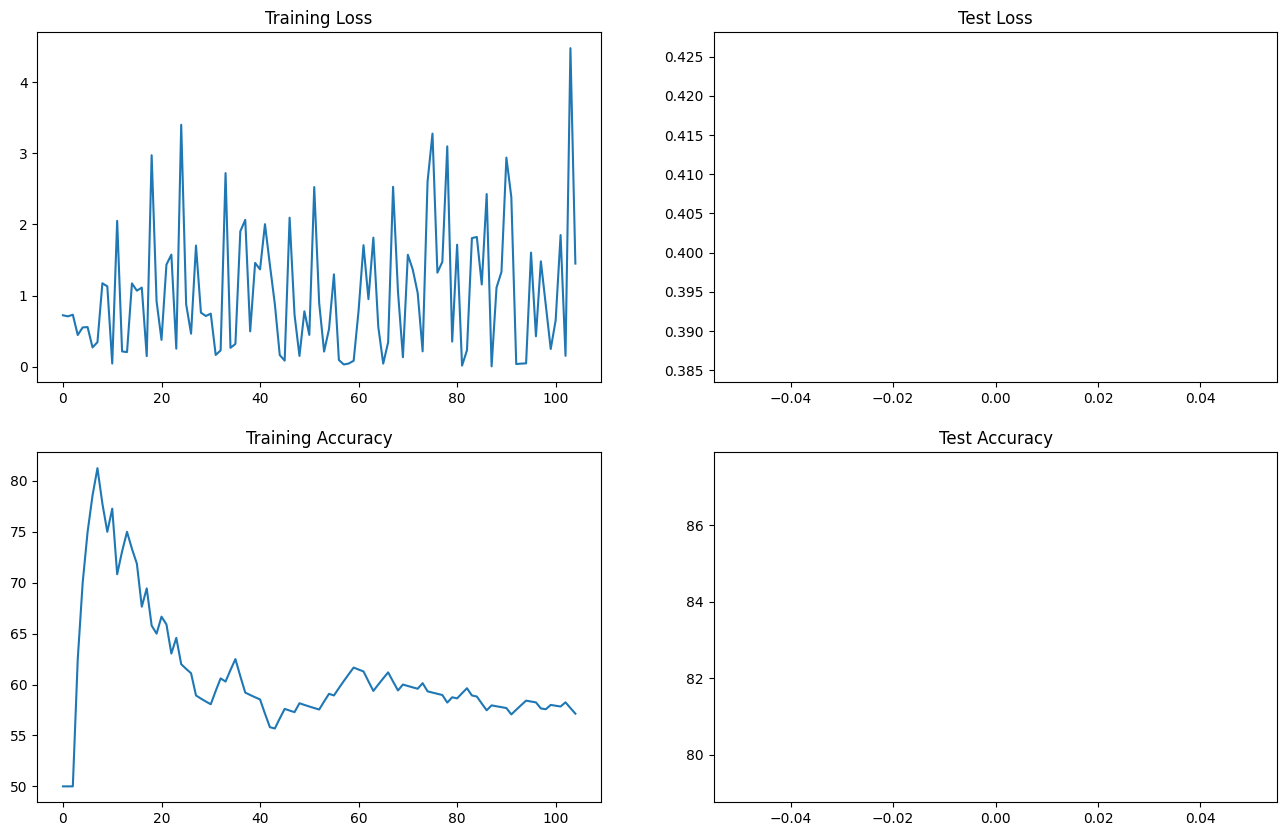

In [61]:
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_acc]
test_losses1 = [i for i in test_losses]
test_acc1 = [i for i in test_acc]
fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")